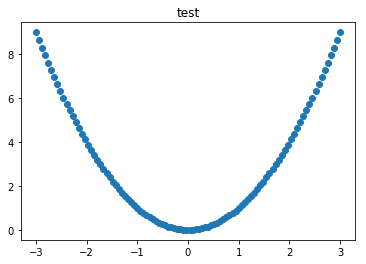

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline #讓他顯示，同於show的功能
x= np.linspace(-3,3,100) #生成一個-3~3,個數為100的等差級數
y=x**2
plt.plot(x,y,"o") #"o"是用點來畫
plt.title("test")
plt.show()

Text(0.5,1,'The bias variance trade_off')

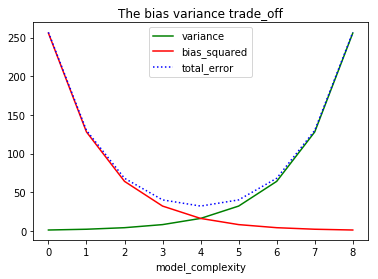

In [4]:
import matplotlib.pyplot as plt
variance=[1,2,4,8,16,32,64,128,256]
bias_squared=[256,128,64,32,16,8,4,2,1]
total_error=[x+y for x,y in zip(variance,bias_squared)] #zip是可以把元素壓縮成tuple列表

xs=range(len(variance))

plt.plot(xs,variance,'g-',label='variance')
plt.plot(xs,bias_squared,'r-',label='bias_squared')
plt.plot(xs,total_error,'b:',label='total_error') #-,:分別是畫實線or虛線 o則是點
plt.legend(loc=9) #loc=9 中間偏上位置顯示圖例

plt.xlabel("model_complexity")
plt.title("The bias variance trade_off")

In [9]:
xs

range(0, 9)

([<matplotlib.axis.XTick at 0x23f4657a6d8>,
 <a list of 3 Text xticklabel objects>)

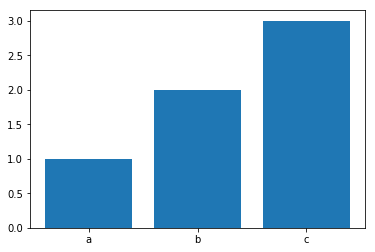

In [25]:
movies=['a','b','c']
oscars=[1,2,3]

xs=[i for i,_ in enumerate(movies)] #產生 key:value 的 tuple 通常從0,1,2開始排下去  enumerate(movies,1) 就會從1開始排

plt.bar(xs,oscars)
plt.xticks([i for i,_ in enumerate(movies)],movies) #x是設定x軸的座標位置,movies是放在座標軸上的標籤

(79.04014336917562, 99.95985663082439, 57.98482339955849, 102.01517660044149)

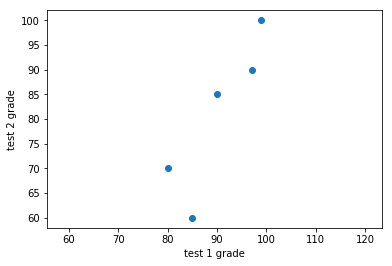

In [26]:
test_1_grades = [ 99,90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal") #讓軸的距離相等

Text(0,0.5,'daily minutes spent on the site')

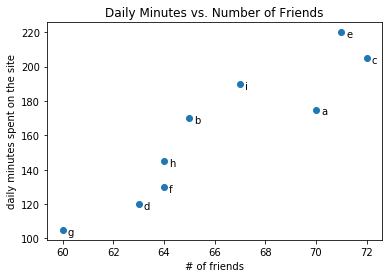

In [38]:
friends=[ 70, 65,72, 63, 71, 64, 60, 64,67]
minutes=[175, 170, 205, 120, 220, 130, 105, 145, 190]
labels=['a', 'b', 'c', 'd', 'e', 'f', "g","h","i"]
plt.scatter(friends, minutes)
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), #把標籤放在對應的點上
                 xytext=(5, -5),#文字對應點要放的位置(不打的話會黏在點上)
                 textcoords='offset points')#圖放的位置

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site") 

機器學習步驟
1.整理資料(資料預處理)
2.選擇模型、fit訓練變數(通常要轉成array)、設定pred變數(測試)
3.調整參數
4.畫圖或輸出結果分數

1.準備資料 （包含資料預處理理）
2.選擇演算法
3.調整參數
4.評估結果

In [ ]:
#準備資料+整理
df=pd.read_csv('iris.data',header=None,names=names) #df是data frame的縮寫 是表格文件 header是標頭 names是給他設定標頭
df.head() #給你看前幾筆的資料
df.info() #了解資料型態
df.describe() #可得出四分位距、平均
SL=df.sepal_length.values #可以把資料裡面的變成array

import matplotlib.pyplot as plt
df.sepal_length.hist(bins=15) #也可直接畫圖  蔡炎龍教授pandas
plt.show()

In [ ]:
#畫圖輔助
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
sns.lmplot("sepal_length",'sepal_width',data=df,fit_reg=False,hue='class') #只能畫欄位類的一樣要給x,y(要用標頭名) data要用表格 fit_reg是回歸 hue是對應座標網格
plt.show()

In [ ]:
#設定變數，拆成測試組和訓練組
import numpy as np
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1].values #轉成array才能跑演算法 iloc[:,:-1] [列,行]
y=df.iloc[:,4].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42) #產生隨機參數訓練

In [ ]:
#選定訓練模型開始跑
from sklearn.neighbors import KNeighborsClassifier #用於將同類分再一起的套件 KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train) #fit訓練變數
pred=knn.predict(x_test)

from sklearn.metrics import accuracy_score #測他的預測分數 
accuracy_score(y_test,pred)

In [ ]:
#看結果看要不要調參數
from sklearn.model_selection import cross_val_score
neighbors = [x for x in range(1,50) if x%2!=0]
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

In [ ]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is sd" % optimal_k)

In [ ]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of N eighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
#資料預處理
import pandas as pd
df=pd.read_csv("data.csv")

df.isnull() #df.isnull().sum()可以看到總共多少空直
df.dropna(axis=1)#刪除有遺漏值得行
df.dropna(axis=0)#刪除有遺漏值得列
df.dropna(subset=["C"])#刪除有遺漏值得特定樣本

In [ ]:
from sklearn.preprocessing import Imputer 
imr=Imputer(missing_values="NaN",strategy="mean",axis=0) #用平均數代替缺值
imr=imr.fit(df.values) #進去的是data frame 的格式 所以要用.values轉呈array的形式
imputed_data=imr.transform(df.values)
imputed_data

In [50]:
import pandas as pd
df=pd.DataFrame([['green','M',10.1,'class1'],['red','L',13.5,'class2'],['blue','XL',15.3,'class1']])
df.columns=['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [47]:
size_mapping={'XL':3,'L':2,'M':1}
df['size']=df['size'].map(size_mapping) #mapping 對應字典=>用來重新編碼
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [48]:
inv_size_mapping ={v:k for k,v in size_mapping.items()} #可以把數字轉回字串，但不能重複轉，會變成NaN 
df['size']=df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [55]:
import numpy as np
class_mapping={label:idx for idx,label in enumerate(np.unique(df['classlabel']))} #用工具設置編碼 idx,label順序沒差
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [58]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
class_le.fit_transform(df['classlabel'].values)  
df
#class_le.inverse_transform(y)可以轉回去

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [77]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X[:,1] = color_le.fit_transform(X[:,1])
X

array([[1, 1, 10.1],
       [2, 0, 13.5],
       [0, 2, 15.3]], dtype=object)

In [76]:
X[:,1]

array(['M', 'L', 'XL'], dtype=object)

In [78]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  0. , 13.5],
       [ 1. ,  0. ,  0. ,  2. , 15.3]])

In [79]:
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,color_green,color_red,size_M,size_XL
0,10.1,1,0,1,0
1,13.5,0,1,0,0
2,15.3,0,0,0,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('regression1.csv')
x=data.iloc[:,0].values #.values是為了讓數據變成array的形式sklearn才能跑
y=data.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_std=sc_x.fit_transform(x) #跑出錯誤 要reshape成二維陣列 原始資料只有一維 因為工具的需求

In [ ]:
X1=x.reshape(-1,1)
X_std=sc_x.fit_transform(X1)